In [61]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean
    
    
def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean
    
def getDataCSV(symbol):
    return pd.read_csv("data/{}.csv".format(str(symbol)), header =0, usecols=['Date','Close'],index_col=['Date'])

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()
    
def plotHistData(df,title="",x="",y="",b=20,mean=999,std=999):
    ax = df.hist(bins=b)
    ax.set_title = title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (mean != 999) and (std != 999) :
        plt.axvline(mean,color="y",linestyle="dashed",linewidth=2)
        plt.axvline(std,color="r",linestyle="dashed",linewidth=2)
        plt.axvline(-std,color="r",linestyle="dashed",linewidth=2)
    plt.show()
    
def plotHistDataMulti(df,tickers,title="",x="",y="",b=20,mean=999,std=999):
    for symbol in tickers:
        df[str(symbol)].hist(bins=20, label=str(symbol))
    plt.legend(loc='upper right')
    plt.show()
    
def dailyReturns(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    dr.iloc[0] = 0
    #dr.iloc[0,:] = 0
    return dr

def dailyReturnsMulti(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    #dr.iloc[0] = 0
    dr.iloc[0,:] = 0
    return dr
    
def plotScatterMulti(df,x="",y="",polyDegree=1):
    global beta,alpha
    df.plot(kind='scatter',x=str(x),y=str(y))
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    plt.show()
    
def predictor(X):
    Y = beta*X + alpha
    return Y




In [62]:
google = getDataYahoo("GOOG",'2017-01-01','2017-01-31',"Adj Close")
market = getDataYahoo("SPY",'2017-01-01','2017-01-31',"Adj Close")
oldDummy = getDataYahoo(["SPY","GOOG"],'2017-01-01','2017-01-31',"Adj Close")
g = google.as_matrix()
m = market.as_matrix()



In [63]:
svr_lin = SVR(kernel = 'linear', C=1e3)
svr_poly = SVR(kernel = 'poly', C=1e3,degree = 2 )
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
print g

[ 786.140015  786.140015  786.900024  794.02002   806.150024  806.650024
  804.789978  807.909973  806.359985  807.880005  807.880005  804.609985
  806.070007  802.174988  805.02002   819.309998  823.869995  835.669983
  832.150024  823.309998  802.320007  796.789978]


In [64]:
svr_lin.fit(m[:, np.newaxis], g[:, np.newaxis])
svr_poly.fit(m[:, np.newaxis], g[:, np.newaxis])
svr_rbf.fit(m[:, np.newaxis], g[:, np.newaxis])


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
newSPY = getDataYahoo("SPY",'2017-01-15','2017-01-31',"Adj Close")
s = newSPY.as_matrix()

In [66]:
print "linear:-",svr_lin.predict(s[:,np.newaxis])
print "poly:-",svr_poly.predict(s[:,np.newaxis])
print "rbf:-",svr_rbf.predict(s[:,np.newaxis])
newDummy = getDataYahoo(["SPY","GOOG"],'2017-01-15','2017-01-31',"Adj Close")
true_google =getDataYahoo("GOOG",'2017-01-15','2017-01-31',"Adj Close")
t_g = true_google.as_matrix()
print "true values"
print(t_g)

linear:- [ 802.37561658  802.37561658  808.09516268  798.48658144  807.98080214
  801.23181413  817.81828997  840.35284748  837.60744081  833.48949893
  817.2462902   817.01756919]
poly:- [-168477.91056115 -168477.91056115 -169021.26700646 -168109.14005334
 -169010.38810021 -168369.39591271 -169947.7113424  -172108.19767053
 -171843.98770959 -171448.20597131 -169893.11270959 -169871.28849084]
rbf:- [ 804.51037062  804.51037062  806.34543378  800.8115242   806.33778896
  803.66619003  806.63626174  835.76943829  830.89328617  823.41014877
  806.51265226  806.47071744]
true values
[ 804.609985  804.609985  806.070007  802.174988  805.02002   819.309998
  823.869995  835.669983  832.150024  823.309998  802.320007  796.789978]


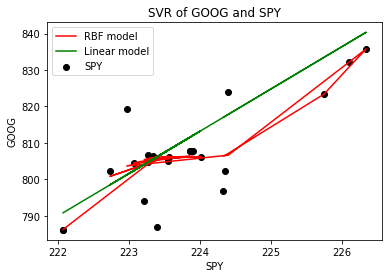

In [67]:
plt.scatter(m,g,color='black',label='SPY')
plt.plot(m,svr_rbf.predict(m[:,np.newaxis]),color='red',label='RBF model')
#plt.plot(m,svr_poly.predict(m[:,np.newaxis]),color='blue',label='POLY model')
plt.plot(m,svr_lin.predict(m[:,np.newaxis]),color='green',label='Linear model')
plt.xlabel('SPY')
plt.ylabel('GOOG')
plt.title('SVR of GOOG and SPY')
plt.legend()
plt.show()


In [68]:
svr_linear_prediction = svr_lin.predict(s[:,np.newaxis])         #storing predictions in arrays
svr_poly_prediction =  svr_poly.predict(s[:,np.newaxis])
svr_rbf_prediction =  svr_rbf.predict(s[:,np.newaxis])

In [69]:
print "mean squared error calculation"
print "linear error:-",sqrt(mean_squared_error(t_g, svr_linear_prediction))
print "poly error:-",sqrt(mean_squared_error(t_g, svr_poly_prediction))
print "rbf error:-",sqrt(mean_squared_error(t_g, svr_rbf_prediction))

mean squared error calculation
linear error:- 9.94645972331
poly error:- 170533.26977
rbf error:- 7.40673030635


In [70]:
print "R2_score ideal value =1.0"
print "linear score:-",r2_score(t_g, svr_linear_prediction)
print "poly score:-",r2_score(t_g, svr_poly_prediction)
print "rbf score:-",r2_score(t_g, svr_rbf_prediction)
                                

R2_score ideal value =1.0
linear score:- 0.372330601118
poly score:- -184506697.355
rbf score:- 0.651945733412
